In [1]:
import pandas as pd
import requests
import io
url="https://raw.githubusercontent.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/master/example-data-science-notebook/iris-data.csv"
s=requests.get(url).content

In [2]:
data=pd.read_csv(io.StringIO(s.decode('utf-8')),na_values=["NA"])

In [3]:
data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
data.dtypes

sepal_length_cm    float64
sepal_width_cm     float64
petal_length_cm    float64
petal_width_cm     float64
class               object
dtype: object

In [64]:
k=data.groupby('class').size()


In [65]:
k=k.reset_index()
k.columns=["class","counts"]

In [66]:
k

,class,counts
0,Iris-setosa,49
1,Iris-versicolor,50
2,Iris-virginica,50


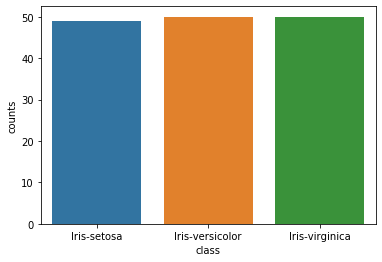

In [67]:
#k=data.groupby('class').size()
sns.barplot(y="counts",x="class",data=k)

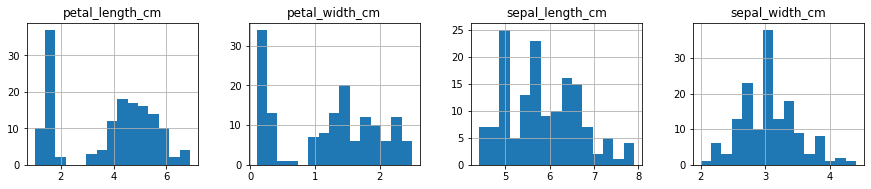

In [70]:
a=data._get_numeric_data().hist(bins=15, figsize=(15, 6), layout=(2, 4))

plt.show()

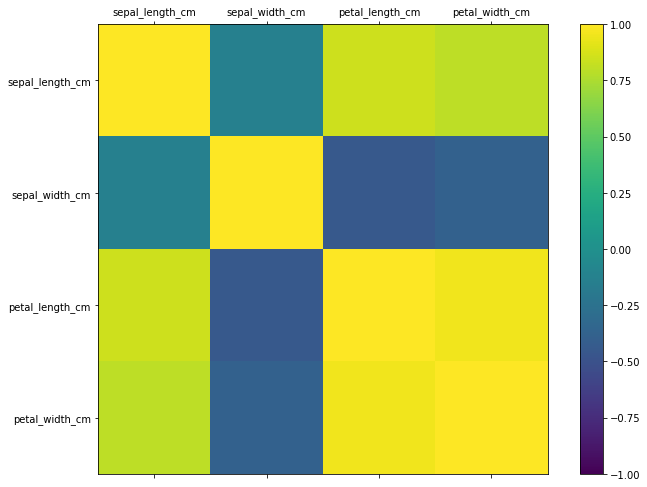

In [82]:
import numpy as np
correlations = data.corr()
# plot correlation matrix
fig = plt.figure()
fig.set_size_inches(11.7,8.27)
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1) 
fig.colorbar(cax)
ticks = np.arange(0,4,1) 
names=data._get_numeric_data().columns
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names) 
ax.set_yticklabels(names)
plt.show()

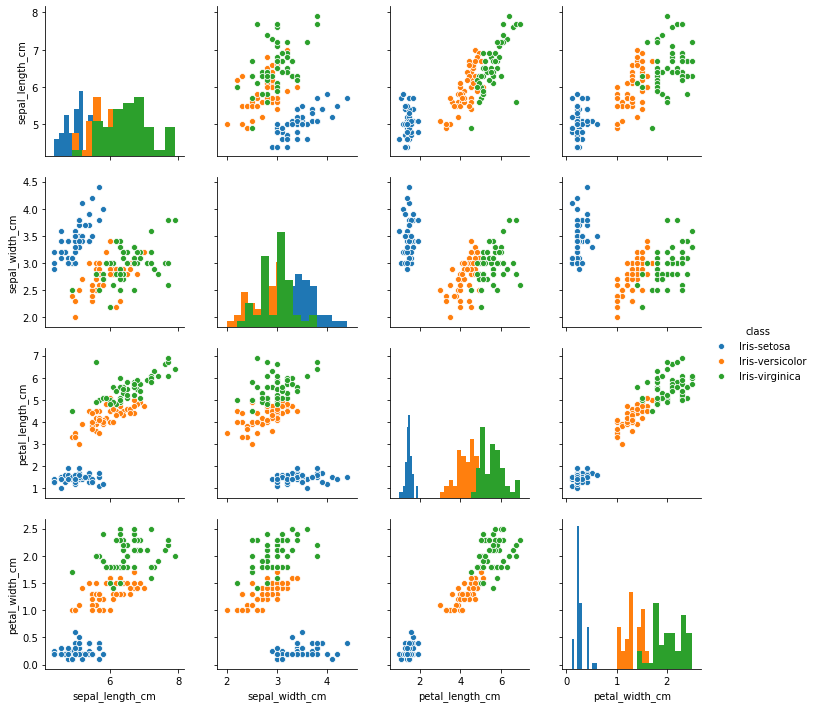

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
b=sns.pairplot(data.dropna(),hue="class",diag_kind="hist")
plt.show()

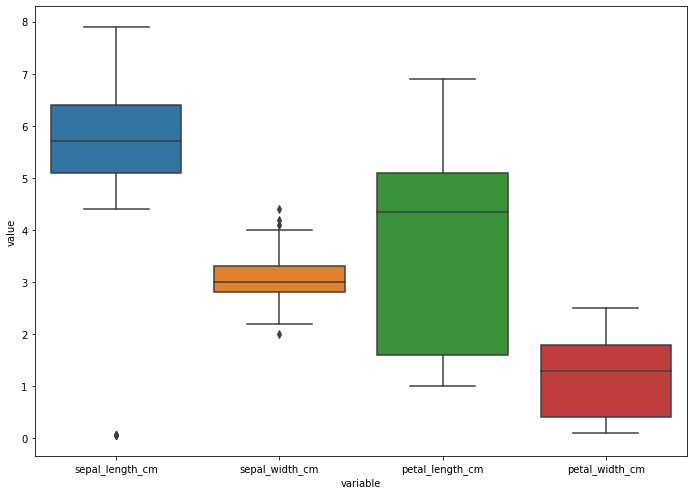

In [11]:
fig,ax=plt.subplots()
fig.set_size_inches(11.7,8.27)
sns.boxplot(x="variable",y="value",data=pd.melt(data._get_numeric_data()),ax=ax)
plt.show()

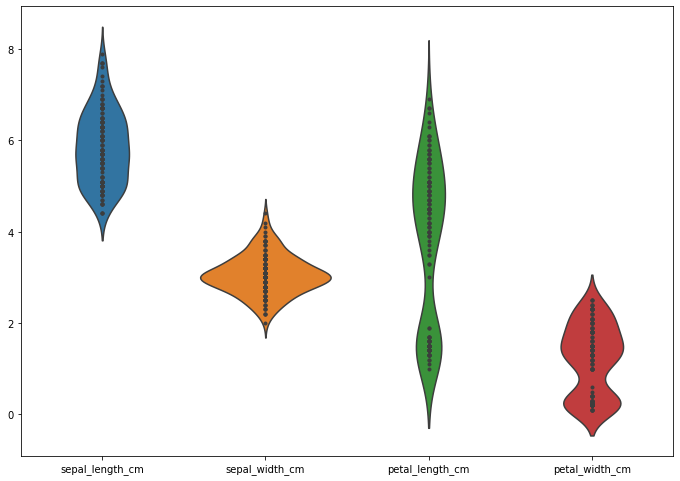

In [72]:
fig,ax=plt.subplots()
fig.set_size_inches(11.7,8.27)
sns.violinplot(data=data._get_numeric_data(),ax=ax,inner="points")
plt.show()

In [7]:
data.loc[data["class"]=="Iris-setossa","class"]="Iris-setosa"
data.loc[data["class"]=="versicolor","class"]="Iris-versicolor"

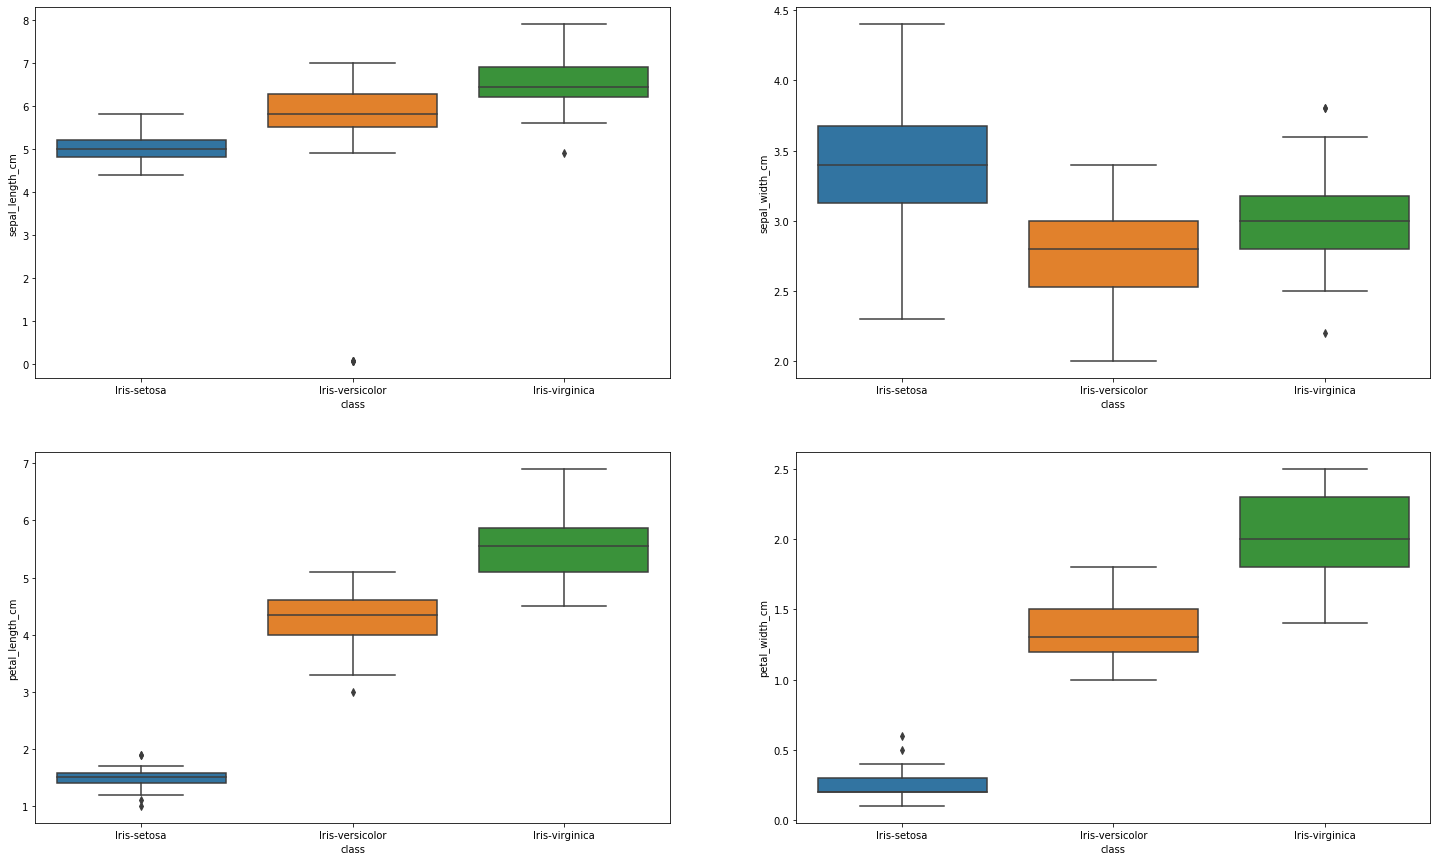

In [8]:
plt.figure(figsize=(25, 15))
for column_index, column in enumerate(data.columns):
    if column=="class":
        continue
    plt.subplot(2, 2, column_index + 1)
    sns.boxplot(x='class', y=column, data=data)

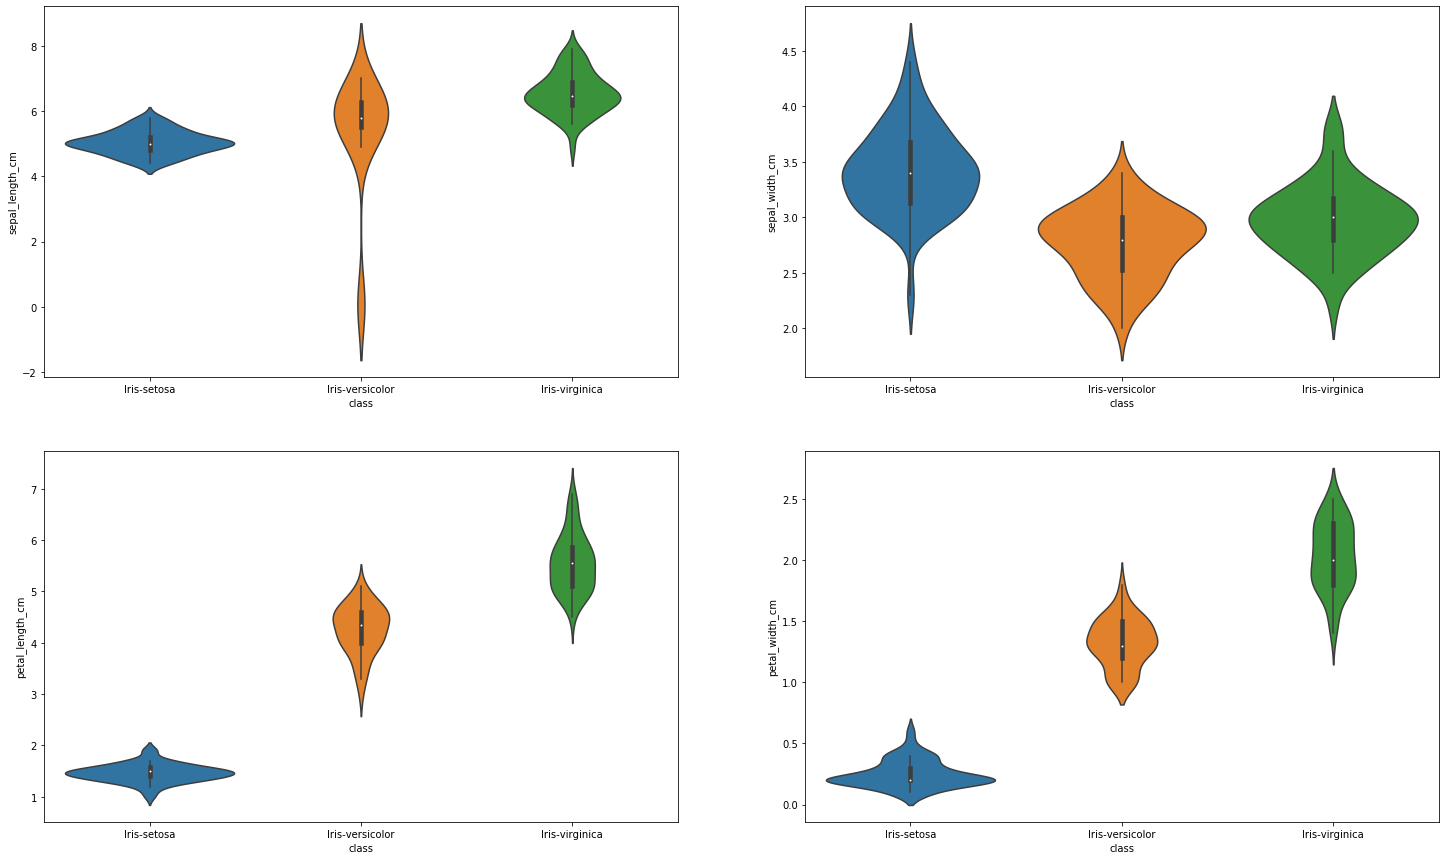

In [9]:
plt.figure(figsize=(25, 15))
for column_index, column in enumerate(data.columns):
    if column=="class":
        continue
    plt.subplot(2, 2, column_index + 1)
    sns.violinplot(x='class', y=column, data=data)

In [10]:
data["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

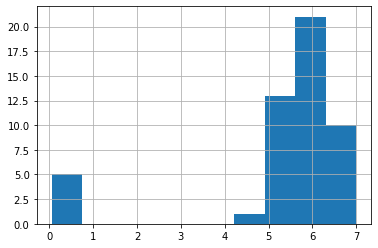

In [11]:
data.loc[data["class"]=="Iris-versicolor","sepal_length_cm"].hist()

In [12]:
data.loc[(data["class"]=="Iris-versicolor") & (data["sepal_length_cm"]< 2)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


In [13]:
data.loc[(data["class"]=="Iris-versicolor") & (data["sepal_length_cm"]< 2),"sepal_length_cm"] *= 100

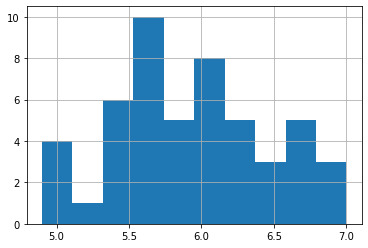

In [14]:
data.loc[data["class"]=="Iris-versicolor","sepal_length_cm"].hist(label="hist of sepal_length")

In [15]:
data.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [16]:
data.loc[data["petal_width_cm"].isnull()]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [17]:
avg_petal_length=round(data.loc[data["class"]=="Iris-setosa","petal_width_cm"].mean(),2)
data.loc[(data["class"]=="Iris-setosa") & (data["petal_width_cm"].isna()), "petal_width_cm"]=avg_petal_length

In [18]:
data.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

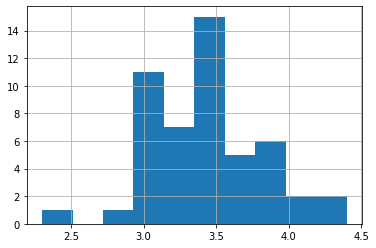

In [19]:
data.loc[data["class"]=="Iris-setosa", "sepal_width_cm"].hist()

In [20]:
data=data.loc[(data["class"]!="Iris-setosa") | (data["sepal_width_cm"]>2.5)]

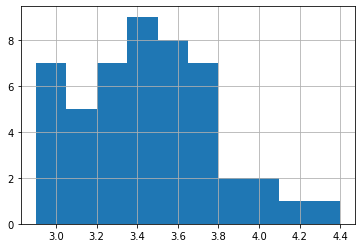

In [21]:
data.loc[data["class"]=="Iris-setosa", "sepal_width_cm"].hist()

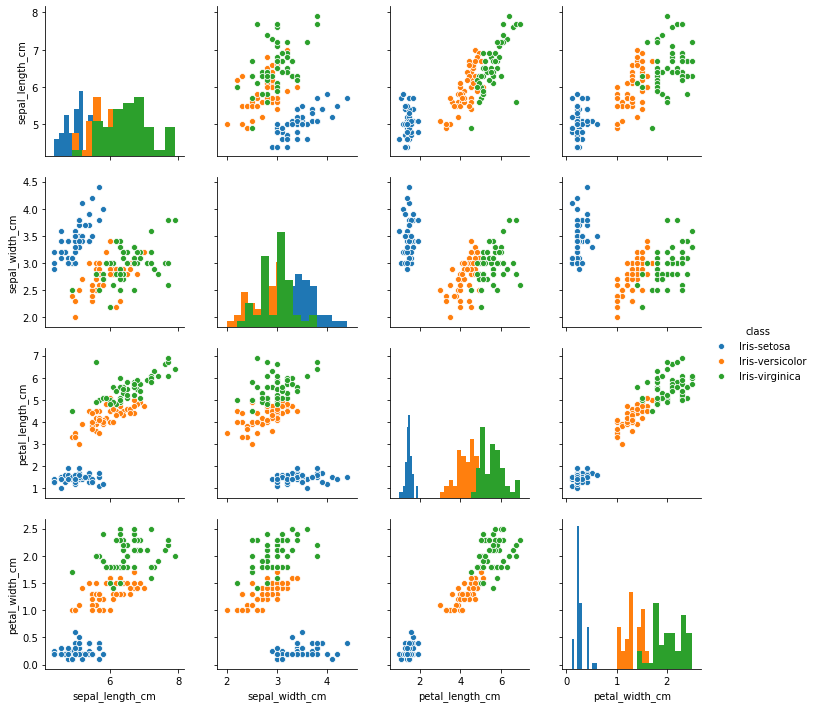

In [23]:
sns.pairplot(data,hue="class",diag_kind="hist")

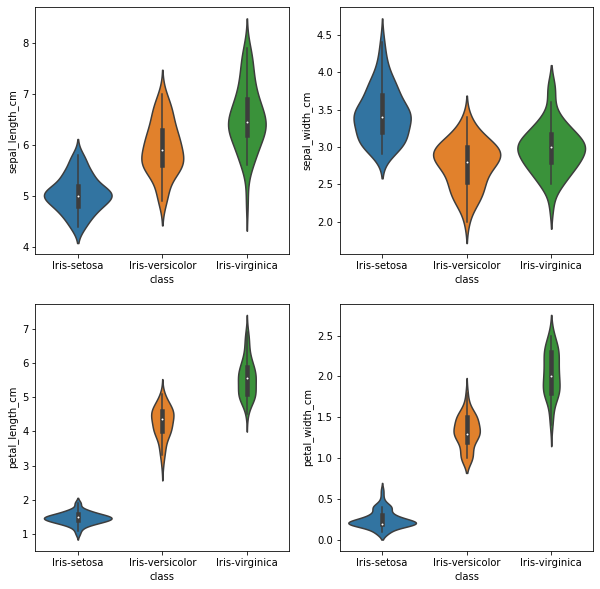

In [24]:
plt.figure(figsize=(10, 10))
for column_index, column in enumerate(data.columns):
    if column=="class":
        continue
    plt.subplot(2, 2, column_index + 1)
    sns.violinplot(x='class', y=column, data=data)

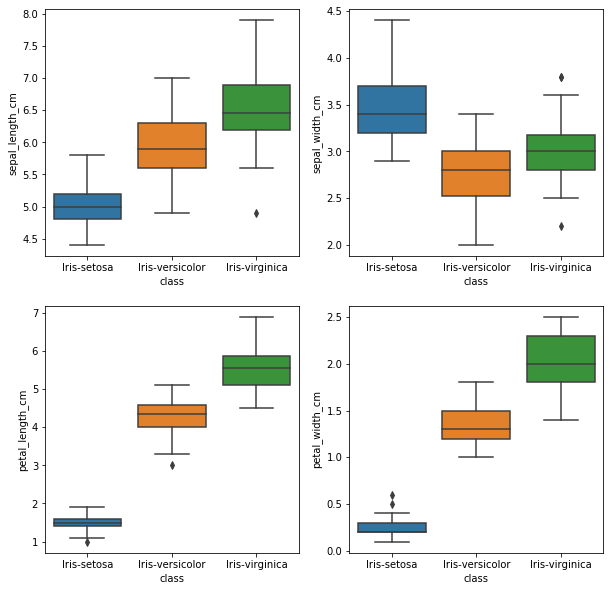

In [115]:
plt.figure(figsize=(10, 10))
for column_index, column in enumerate(data.columns):
    if column=="class":
        continue
    plt.subplot(2, 2, column_index + 1)
    sns.boxplot(x='class', y=column, data=data)

In [116]:
data.columns

Index(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'class'],
      dtype='object')

In [84]:
X=data[data.columns[:-1]].values
Y=data[data.columns[-1:]].values

In [85]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
set_printoptions(precision=3)


In [112]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)

In [141]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(train_data,train_label)
decision_tree_classifier.score(test_data,test_label)

0.9736842105263158

In [100]:
num_folds = 10
seed = 7
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression(solver='liblinear'))) 
models.append(('KNN', KNeighborsClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('CART', DecisionTreeClassifier()))


In [104]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.946212 (0.059887)
KNN: 0.946212 (0.043972)
LDA: 0.973485 (0.057421)
NB: 0.955303 (0.044748)
SVM: 0.973485 (0.040550)
CART: 0.946212 (0.059887)


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

In [108]:
results

[array([0.917, 1.   , 0.818, 1.   , 0.909, 0.909, 0.909, 1.   , 1.   ,
        1.   ]),
 array([0.917, 0.909, 1.   , 0.909, 1.   , 0.909, 0.909, 1.   , 1.   ,
        0.909]),
 array([0.917, 1.   , 1.   , 1.   , 1.   , 0.818, 1.   , 1.   , 1.   ,
        1.   ]),
 array([0.917, 0.909, 1.   , 1.   , 1.   , 0.909, 0.909, 1.   , 1.   ,
        0.909]),
 array([0.917, 1.   , 1.   , 1.   , 1.   , 0.909, 0.909, 1.   , 1.   ,
        1.   ]),
 array([0.917, 0.909, 1.   , 1.   , 1.   , 0.909, 0.818, 1.   , 1.   ,
        0.909])]

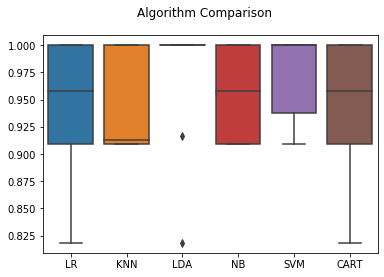

In [111]:
fig = plt.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
sns.boxplot(data=results) 
ax.set_xticklabels(names)
plt.show()

In [1]:

from sklearn.preprocessing import scale
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression(solver='liblinear'))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
    LinearDiscriminantAnalysis())])))

pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(gamma='auto'))])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


NameError: name 'Pipeline' is not defined

In [ ]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', Scale()),('LR',
LogisticRegression(solver='liblinear'))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
    LinearDiscriminantAnalysis())])))

pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(gamma='auto'))])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)